In [4]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer

In [5]:
df=pd.read_csv('Production System Dataset.csv')

In [6]:
df

,timestamp,machine_id,machine_type,temperature,vibration_level,power_consumption,pressure,material_flow_rate,cycle_time,error_rate,downtime,maintenance_flag,efficiency_score,production_status
0,2025-03-10 08:00:00,M003,Welder,78.302879,2.043751,23.059855,5.088076,20.011026,118.146510,0.883246,0,0,11.675410,0
1,2025-03-10 08:01:00,M004,Conveyor,80.877076,2.175590,16.012814,5.412956,18.375739,123.062058,0.777073,38,0,3.292706,0
2,2025-03-10 08:02:00,M001,Drill,71.315418,2.154465,15.759164,5.769405,17.112107,122.754064,0.757374,37,0,5.762582,0
3,2025-03-10 08:03:00,M003,Conveyor,76.496198,2.245978,16.490268,4.618784,21.090684,118.990270,0.796481,39,0,0.851911,0
4,2025-03-10 08:04:00,M003,CNC,73.612202,2.097302,18.064286,5.431250,20.868592,113.749872,0.813361,0,0,18.663902,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2455,2025-03-12 00:55:00,M001,Conveyor,80.585617,1.744735,14.463169,5.034138,20.826884,113.009590,0.652834,0,0,34.716573,0
2456,2025-03-12 00:56:00,M003,Drill,78.171483,2.732367,19.990335,4.971981,18.291071,132.987186,0.988201,0,0,1.179945,0
2457,2025-03-12 00:57:00,M003,Welder,78.782847,2.131138,19.874735,5.290168,22.551457,114.350925,0.847650,0,0,15.234984,0
2458,2025-03-12 00:58:00,M001,Drill,77.939129,2.027617,19.660323,4.924919,22.706616,117.406875,0.807874,0,0,19.212551,0


In [7]:
df.isnull().sum()

timestamp              0
machine_id             0
machine_type           0
temperature           49
vibration_level       56
power_consumption     55
pressure               0
material_flow_rate     0
cycle_time             0
error_rate             0
downtime               0
maintenance_flag       0
efficiency_score       0
production_status      0
dtype: int64

In [8]:
imputer=SimpleImputer(strategy="mean")
df[['temperature', 'vibration_level','power_consumption']] = imputer.fit_transform(df[['temperature', 'vibration_level','power_consumption']])

In [9]:
df.isnull().sum()

timestamp             0
machine_id            0
machine_type          0
temperature           0
vibration_level       0
power_consumption     0
pressure              0
material_flow_rate    0
cycle_time            0
error_rate            0
downtime              0
maintenance_flag      0
efficiency_score      0
production_status     0
dtype: int64

<Axes: >

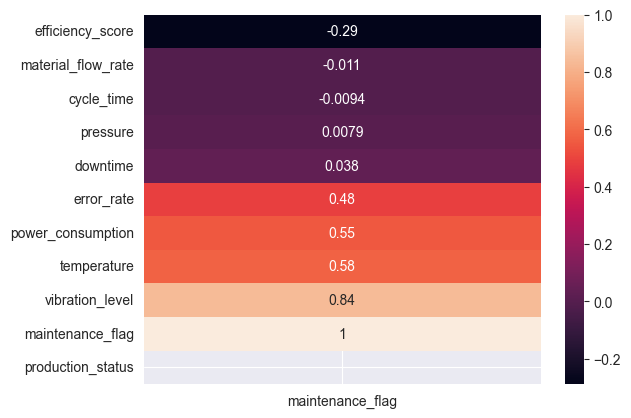

In [10]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr[['maintenance_flag']].sort_values('maintenance_flag'),annot=True)

In [11]:
#clearly vibration_level,power_consumption and temperature are mainly afffecting maintenace status so we are only choosing these columns

In [12]:
df=df[['machine_id','vibration_level','power_consumption','temperature','maintenance_flag']]

In [13]:
df1=df[df['machine_id']=='M001']
df2=df[df['machine_id']=='M002']
df3=df[df['machine_id']=='M003']
df4=df[df['machine_id']=='M004']

In [14]:
df1

,machine_id,vibration_level,power_consumption,temperature,maintenance_flag
2,M001,2.154465,15.759164,71.315418,0
6,M001,7.427527,27.746653,91.700813,1
7,M001,1.592745,21.387094,70.505322,0
15,M001,2.104579,18.513502,74.000923,0
21,M001,2.262851,15.355305,74.888519,0
...,...,...,...,...,...
2446,M001,2.115791,21.906119,82.956909,0
2449,M001,2.230957,16.579969,86.105875,1
2454,M001,2.561322,19.068694,77.989287,0
2455,M001,1.744735,14.463169,80.585617,0


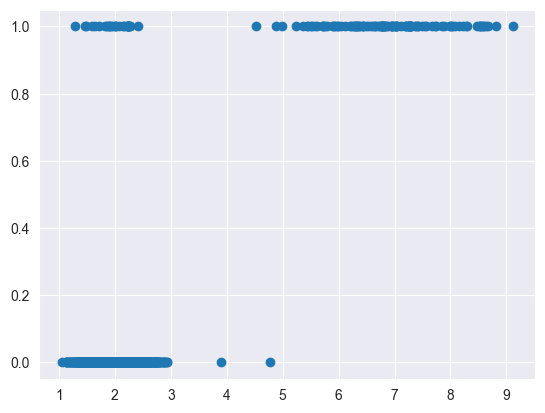

In [15]:
plt.scatter(df['vibration_level'],df['maintenance_flag']) 

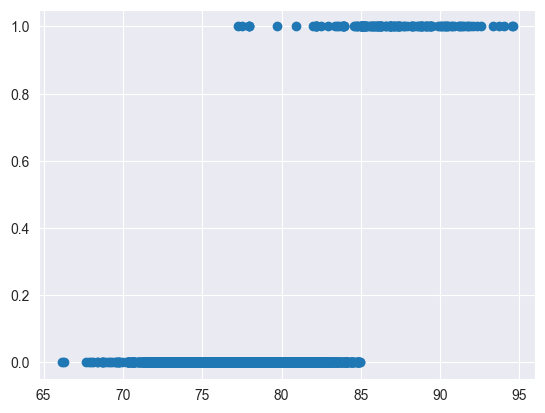

In [16]:
plt.scatter(df['temperature'],df['maintenance_flag'])

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [18]:
x_train,x_test,y_train,y_test=train_test_split(df1.iloc[:,1:4],df1.iloc[:,-1],test_size=0.2,random_state=42)
model1 =RandomForestClassifier()
model1.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [19]:
x_train,x_test,y_train,y_test=train_test_split(df2.iloc[:,1:4],df2.iloc[:,-1],test_size=0.2,random_state=42)
model2 =RandomForestClassifier()
model2.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [20]:
x_train,x_test,y_train,y_test=train_test_split(df3.iloc[:,1:4],df3.iloc[:,-1],test_size=0.2,random_state=42)
model3 =RandomForestClassifier()
model3.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [21]:
x_train,x_test,y_train,y_test=train_test_split(df4.iloc[:,1:4],df4.iloc[:,-1],test_size=0.2,random_state=42)
model4 =RandomForestClassifier()
model4.fit(x_train,y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [22]:
import pickle
with open("model1.pkl","wb") as f:
    pickle.dump(model1,f)
with open("model2.pkl","wb") as f:
    pickle.dump(model2,f)
with open("model3.pkl","wb") as f:
    pickle.dump(model3,f)
with open("model4.pkl","wb") as f:
    pickle.dump(model4,f)